In [ ]:
# REF https://github.com/AndersonJo/text-classification-tutorial/blob/master/spam-filtering-with-naive-bayes.ipynb

In [1]:
%pylab inline
import numpy as np 
import pandas as pd
import seaborn as sns
import string

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1', usecols=(0, 1), names=('class', 'text'), skiprows=1)
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

,class,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


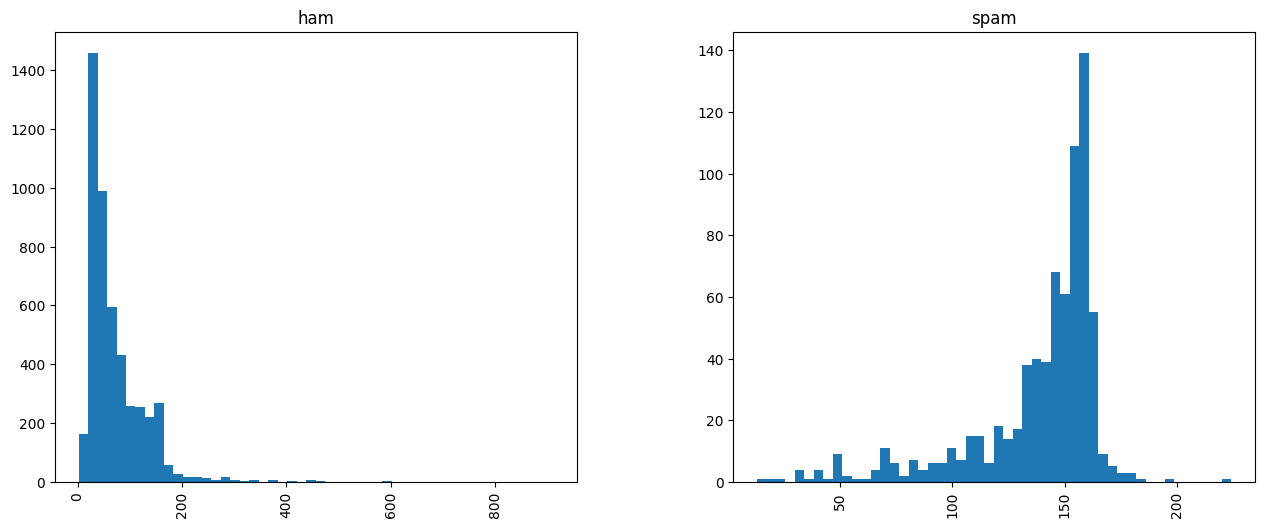

In [4]:
data['length'] = data['text'].apply(len)
display(data.head())
ax = data.hist('length', by='class', bins=50, figsize=(15, 6))

In [5]:
def process_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    cleaned_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return cleaned_words

In [6]:
data['text'].apply(process_text)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, å£750, Po...
5568                   [Ì, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: text, Length: 5572, dtype: object

In [7]:
pipeline = Pipeline([
    ('vectorization', CountVectorizer(analyzer=process_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [8]:
train_x, test_x, train_y, test_y = train_test_split(data['text'], data['class'], test_size=0.2)
pipeline.fit(train_x, train_y)

Pipeline(steps=[('vectorization',
                 CountVectorizer(analyzer=<function process_text at 0x0000017510D63798>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [9]:
pred_y = pipeline.predict(test_x)
# classification_report(test_y, pred_y)
accuracy_score(test_y, pred_y)

NameError: name 'accuracy_score' is not defined

In [ ]:
sns.heatmap(confusion_matrix(test_y, pred_y), fmt='.1f', annot=True)